### PROBLEM STATEMENT

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#### The steps to be followed in this exercise are as follows:

1. Reading, understanding and visualizing the data

2. Preparing the data for model training (train-test split, rescaling)

3. Training the model

4. Residual analysis

5. Prediction and evaluation of the test set



#### Step 1: Reading and Understanding of data


Importing Neccesary Libraries

In [1]:
#FOR ANALYSIS AND NUMERICAL FUNCTIONS
import pandas as pd
import numpy as np

# FOR VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt

# EXTRA
import warnings
warnings.filterwarnings(action = 'ignore')

Reading Dataset

In [2]:
df=pd.read_csv("day.csv")

In [3]:
# To check the top 5 rows of the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# To check the shape(number of rows & columns) of the data
df.shape

(730, 16)

In [5]:
# To check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# To check the description(basic stats of numeric columns) of the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# To check the misssing values in the dataset
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### Visualization of Data

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
Cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
Cont_cols=["temp","atemp","hum","windspeed","casual","registered","cnt","instant","dteday"]

In [10]:
len(Cat_cols)+len(Cont_cols)

16

###### Univariate Analysis

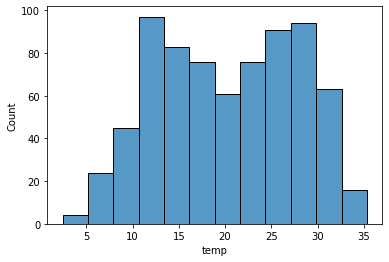

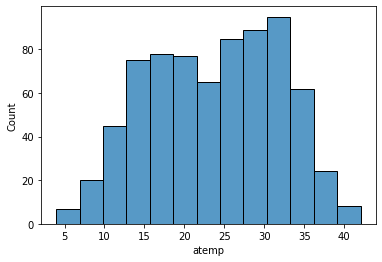

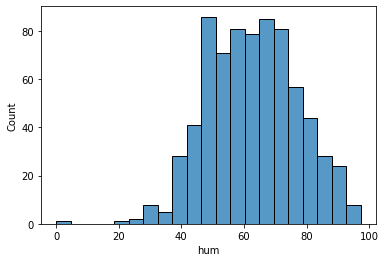

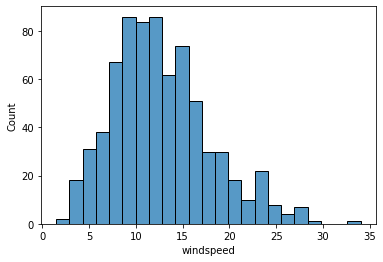

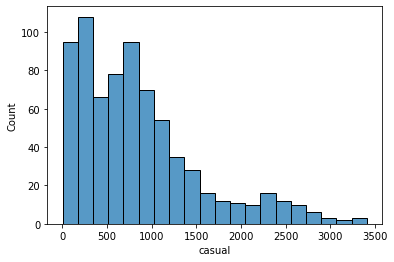

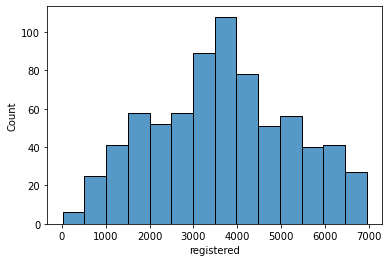

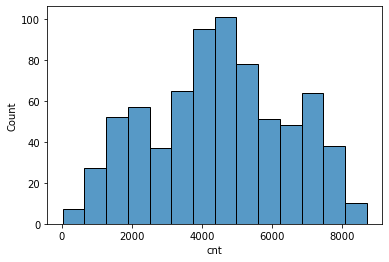

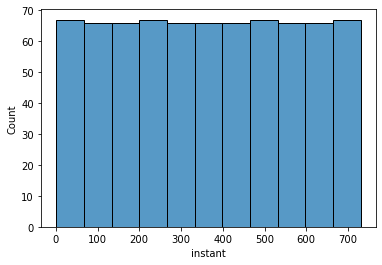

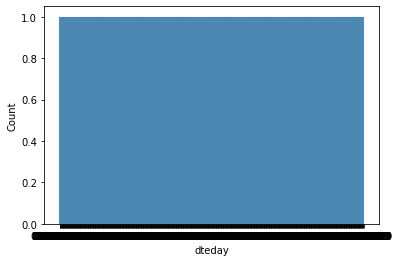

In [11]:
for i in Cont_cols:
    sns.histplot(df[i])
    plt.show()

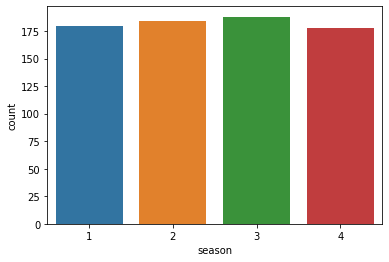

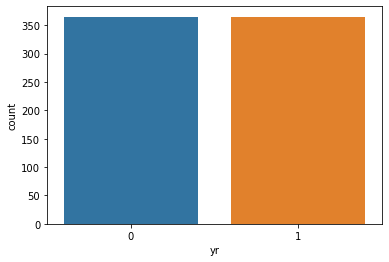

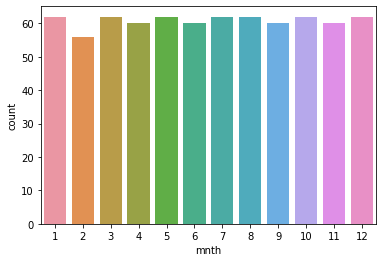

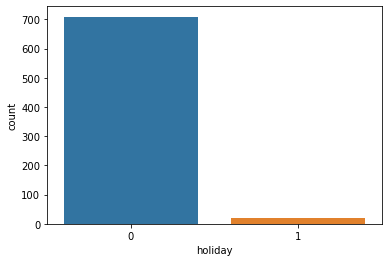

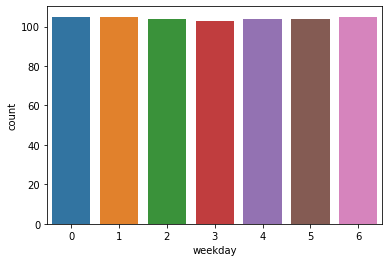

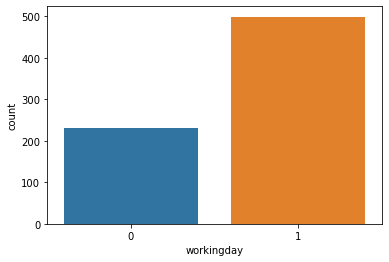

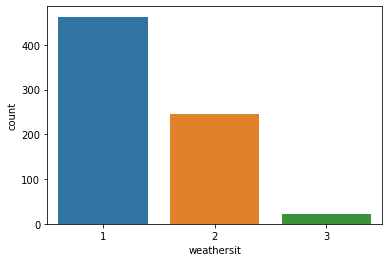

In [12]:
for i in Cat_cols:
    sns.countplot(df[i])
    plt.show()

###### Bi-Variate Analysis

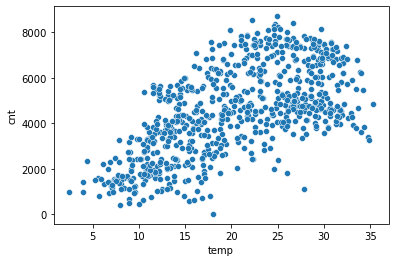

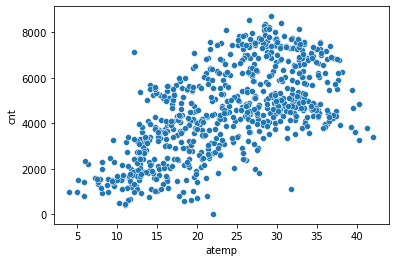

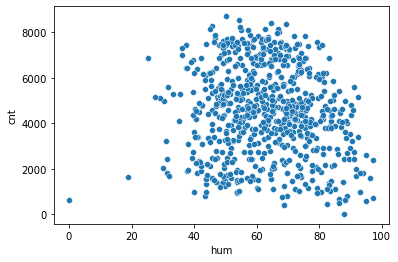

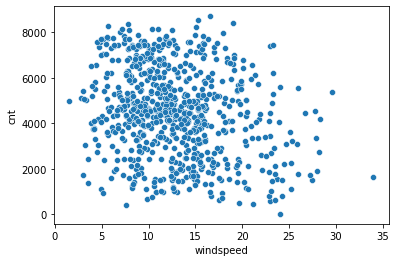

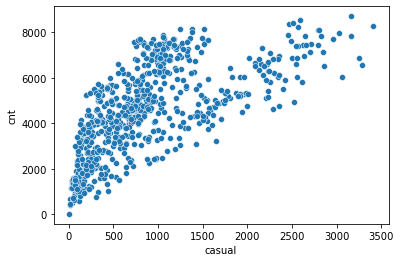

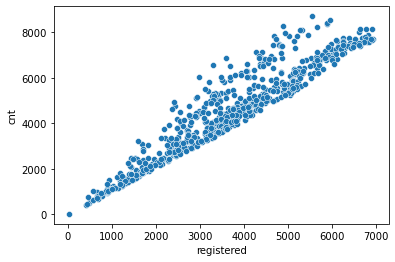

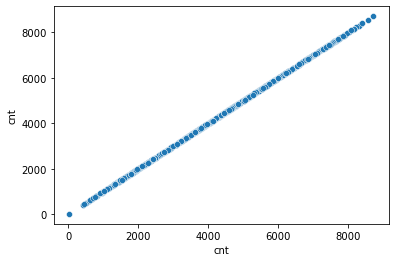

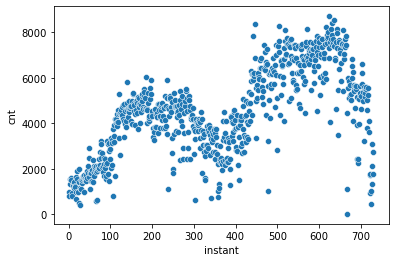

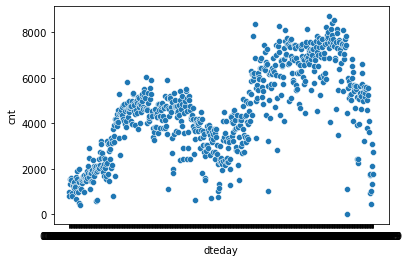

In [13]:
for i in Cont_cols:
    sns.scatterplot(df[i],df['cnt'])
    plt.show()

###### Multivariate Analysis

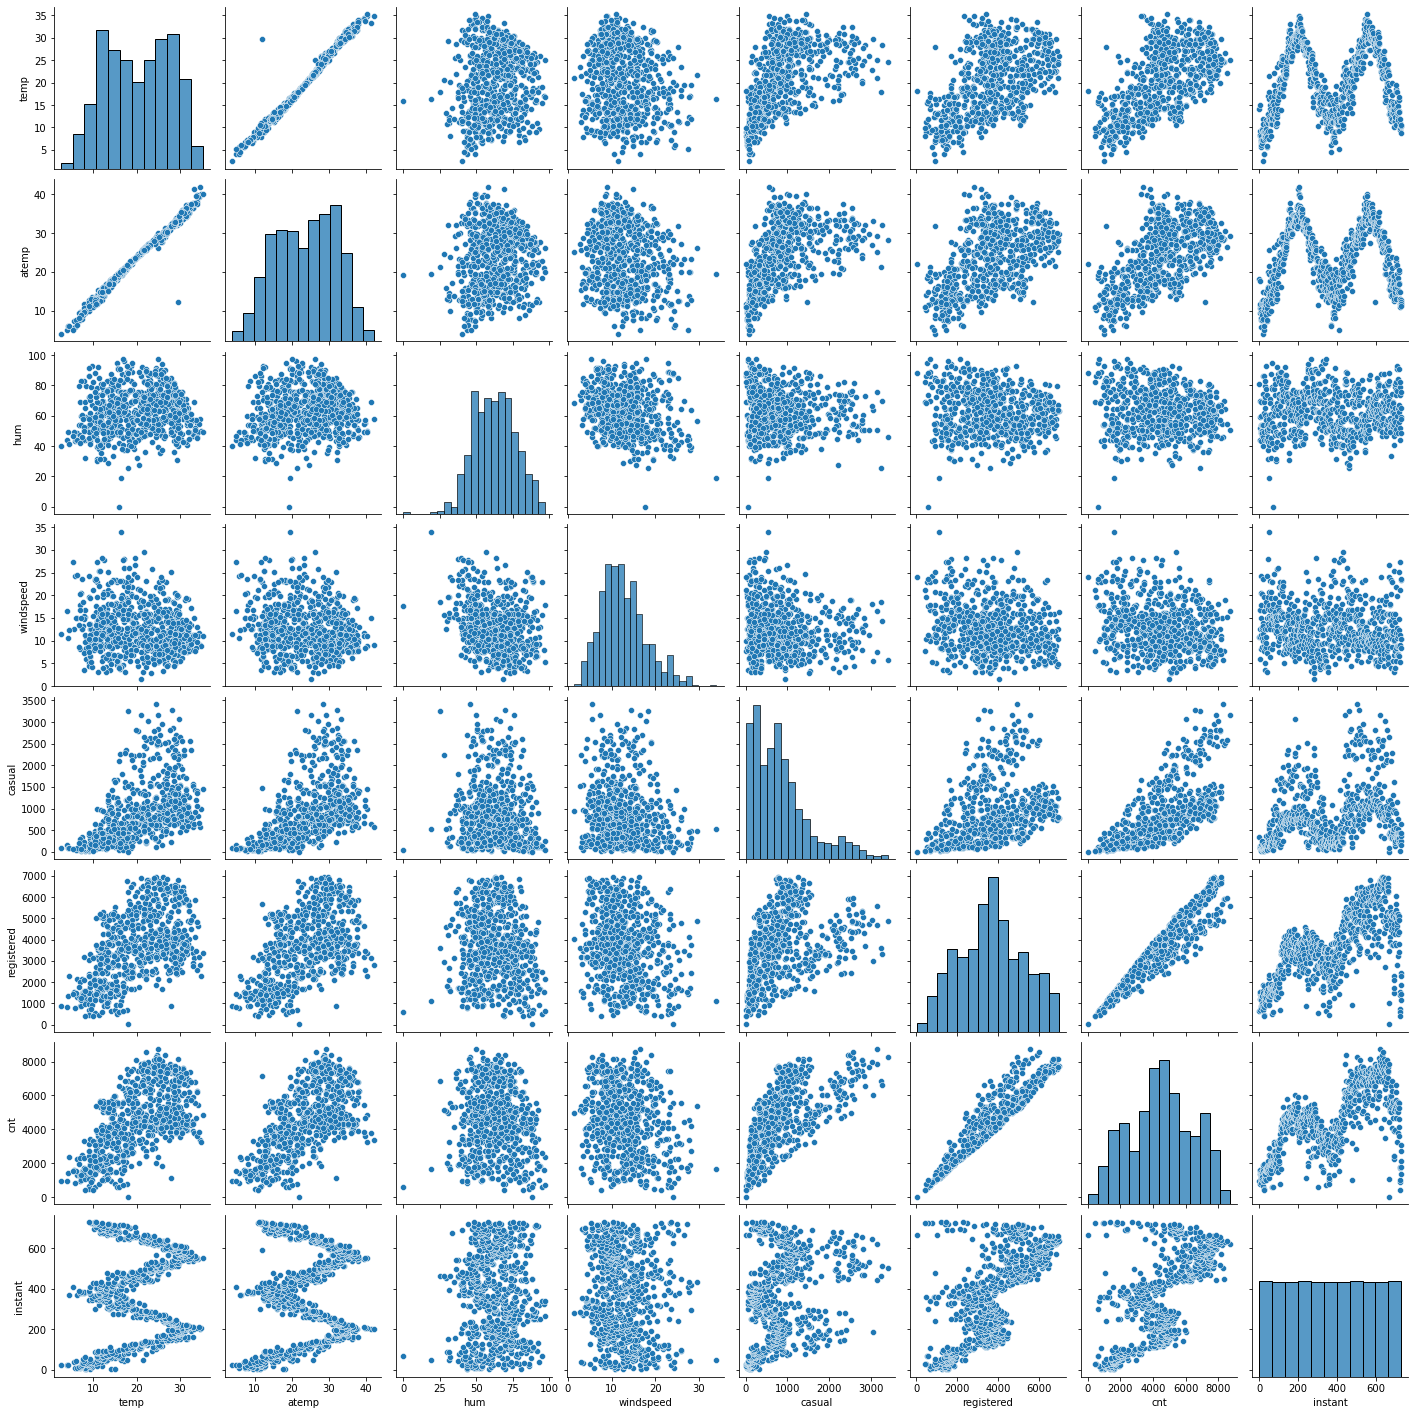

In [14]:
sns.pairplot(df[Cont_cols])

From the given Piarplot, we can initially say that there is correlation between CNT and temp, hum and windspeed respectively.

In [15]:
#mapping categorical variables with their subcategories to help with visualization analysis 
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df['yr']=df.yr.map({0:2018,1:2019})

In [16]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


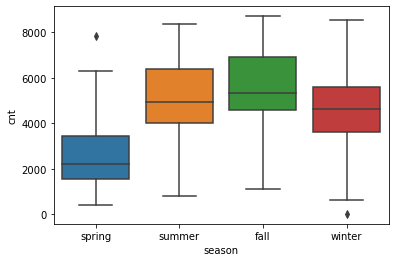

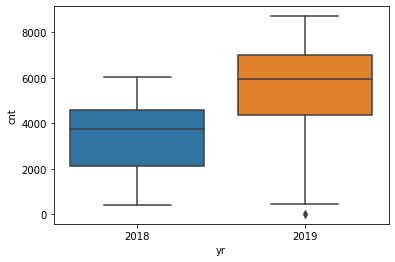

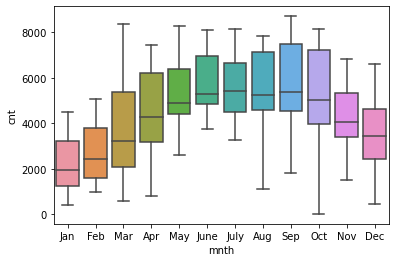

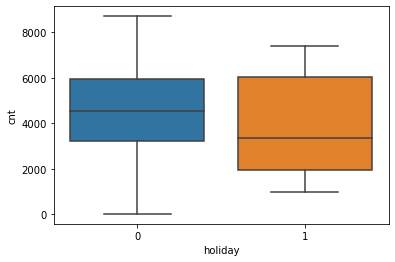

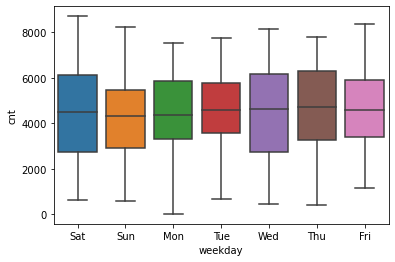

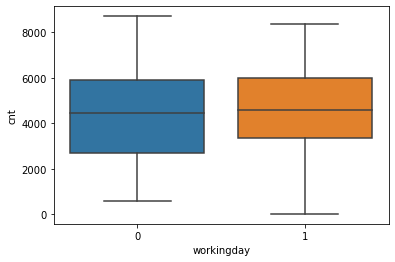

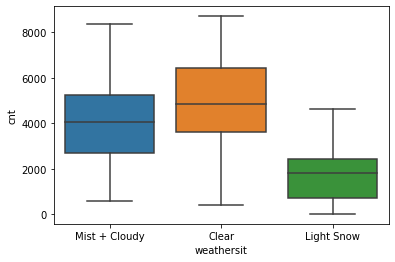

In [17]:
for i in Cat_cols:
    sns.boxplot(df[i],df['cnt'])
    plt.show()

Some of the observations from the plots above are as follows:

1. People are more likely to rent bikes in the summer and the fall season

2. Bike rental rates are the most in September and October

3. Saturday, Wednesday and Thursday are the days where more bikes are rented

4. Most bike rentals take place in the clear weather

5. More bikes were rented in 2019

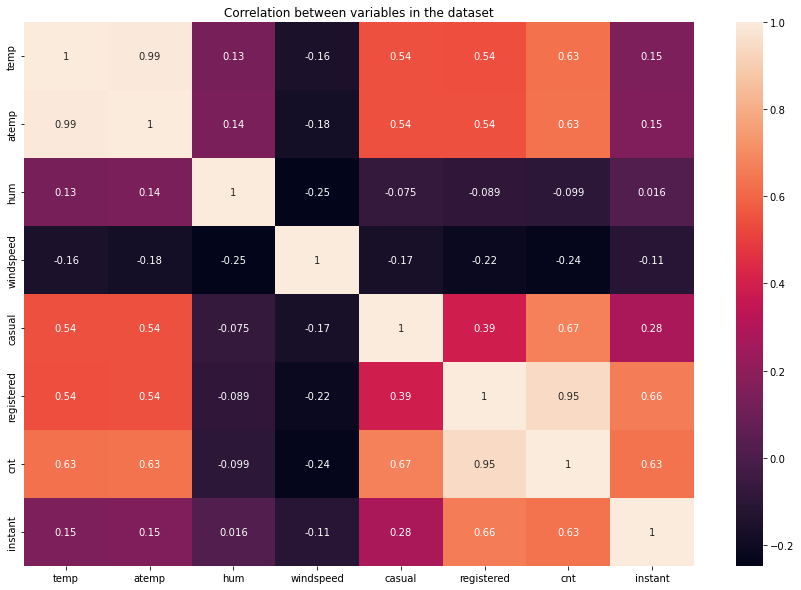

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df[Cont_cols].corr(),annot=True)
plt.title('Correlation between variables in the dataset')
plt.show()

As we can see, there are several variables correlated to count variable (cnt) such as registered, casual, temp, atemp, yr, workingday, we can thereby conduct a linear regresssion model

###### Pre-Processing Steps

dropping the non-required varibales from the dataset

In [19]:
df=df.drop(["instant","dteday","casual","registered"],axis=1)

checking the type, info, description, missing values, shape of the dataset


In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [22]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [23]:
df.shape

(730, 12)

In [24]:
df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

###### DUMMY VARIABLE CREATION

In [25]:
#creating dummy variables for the variables of month, weekday, weathersit, seasons

month = pd.get_dummies(df.mnth, drop_first=True)
weekday = pd.get_dummies(df.weekday, drop_first=True)
weathersit = pd.get_dummies(df.weathersit, drop_first=True)
season = pd.get_dummies(df.season, drop_first=True)


In [26]:
#adding the dummy variables to the original dataframe
df1 = pd.concat([df,month, weekday, weathersit, season], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [27]:
# dropping the variables season,mnth,weekday,weathersit as we have created the dummies for it
df1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Step 2: Preparing the data for model training (train-test split, rescaling)


##### Train Test Split

In [28]:
#preparing the variables for model building 

X=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [30]:
#checking the variables

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [31]:
X_train.shape

(511, 29)

In [32]:
X_test.shape

(219, 29)

##### Rescaling

In [33]:
#Standerdization
#z=x-xmean/sigma

X_train=(X_train-X_train.mean())/X_train.std()

In [34]:
X_test=(X_test-X_test.mean())/X_test.std()

#### Step 3: Training the model

##### Feature Selection

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True])

In [36]:
selected_features=list(X_train.columns[selector.support_])
selected_features

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'July',
 'Sep',
 'Sat',
 'Sun',
 'Light Snow',
 'Mist + Cloudy',
 'spring',
 'summer',
 'winter']

In [37]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [38]:
#add a constant (intercept)

import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [40]:
#Creating first model
model_1=sm.OLS(y_train,X_train_sm)

#Fit
result_1=model_1.fit()

#Params
result_1.params

const            4.491128e+03
yr               1.007083e+03
holiday         -3.464301e+15
workingday      -1.028749e+16
temp             1.034925e+03
hum             -2.013269e+02
windspeed       -2.617039e+02
July            -1.233288e+02
Sep              1.934911e+02
Sat             -7.953983e+15
Sun             -7.698883e+15
Light Snow      -3.585185e+02
Mist + Cloudy   -2.385370e+02
spring          -2.040076e+02
summer           2.009093e+02
winter           3.802375e+02
dtype: float64

In [41]:
# Summary of model
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          6.92e-191
Time:                        00:46:35   Log-Likelihood:                -4119.1
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     496   BIC:                             8332.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4491.1279     34.423    130.470      0.000    4423.496    4558.760
yr             1007.0833     35.345     28.493      0.000     937.640    1076.527
holiday       -3.464e+15   2.71e+15     -1.278      0.202   -8.79e+15    1.86e+15
workingday    -1.029e+16   8.05e+15     -1.278      0.202   -2.61e+16    5.52e+15
temp           1034.9251     65.530     15.793      0.000     906.174    1163.676
hum            -201.3269     47.675     -4.223      0.000    -294.997    -107.656
windspeed      -261.7039     37.890     -6.907      0.000    -336.149    -187.259
July           -123.3288     42.106     -2.929      0.004    -206.056     -40.601
Sep             193.4911     39.237      4.931      0.000     116.400     270.582
Sat           -7.954e+15   6.22e+15     -1.278      0.202   -2.02e+16    4.27e+15
Sun           -7.699e+15   6.02e+15     -1.278      0.202   -1.95e+16    4.13e+15
Light Snow     -358.5185     38.543     -9.302      0.000    -434.246    -282.791
Mist + Cloudy  -238.5370     43.307     -5.508      0.000    -323.626    -153.448
spring         -204.0076     77.225     -2.642      0.009    -355.735     -52.280
summer          200.9093     55.814      3.600      0.000      91.248     310.570
winter          380.2375     64.438      5.901      0.000     253.632     506.843
==============================================================================
Omnibus:                       73.016   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.443
Skew:                          -0.753   Prob(JB):                     9.75e-38
Kurtosis:                       5.395   Cond. No.                     5.14e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.12e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

How to check the conditions for variables elimination?
Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

* High p-value, high VIF : definitely drop

* High-Low:

    1. High p, low VIF : remove these first, then build model again and check VIF again
    2. Low p, high VIF : remove these later
* Low p-value, low VIF : keep variable

In [43]:
# Dropping Holiday varibale due to high p-value

X_train_sm=X_train_sm.drop(["holiday"],axis=1)
X_test_sm=X_test_sm.drop(["holiday"],axis=1)

In [46]:
# Running the model again
#Creating second model
model_2=sm.OLS(y_train,X_train_sm)

#Fit
result_2=model_2.fit()

#Params
result_2.params

const            4491.303327
yr               1001.336763
workingday        417.822440
temp             1036.666904
hum              -205.193566
windspeed        -266.769640
July             -126.637162
Sep               193.336914
Sat               353.254691
Sun               180.264980
Light Snow       -360.454978
Mist + Cloudy    -234.180288
spring           -205.809861
summer            201.913218
winter            378.238765
dtype: float64

In [47]:
# Summary of model
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          7.31e-192
Time:                        00:56:48   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4491.3033     34.266    131.072      0.000    4423.979    4558.628
yr             1001.3368     34.898     28.693      0.000     932.770    1069.903
workingday      417.8224    103.352      4.043      0.000     214.762     620.883
temp           1036.6669     65.218     15.895      0.000     908.529    1164.805
hum            -205.1936     47.363     -4.332      0.000    -298.251    -112.136
windspeed      -266.7696     37.511     -7.112      0.000    -340.470    -193.069
July           -126.6372     41.835     -3.027      0.003    -208.833     -44.441
Sep             193.3369     39.059      4.950      0.000     116.596     270.078
Sat             353.2547     84.441      4.183      0.000     187.349     519.161
Sun             180.2650     82.172      2.194      0.029      18.816     341.714
Light Snow     -360.4550     38.338     -9.402      0.000    -435.780    -285.130
Mist + Cloudy  -234.1803     42.977     -5.449      0.000    -318.620    -149.741
spring         -205.8099     76.861     -2.678      0.008    -356.824     -54.796
summer          201.9132     55.555      3.634      0.000      92.761     311.065
winter          378.2388     64.127      5.898      0.000     252.245     504.232
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                         6.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Checking model on the basis of VIF(Variance inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.035215
2,workingday,9.079375
3,temp,3.615446
4,hum,1.906795
5,windspeed,1.196046
6,July,1.487669
7,Sep,1.296755
8,Sat,6.060785
9,Sun,5.739480


In [50]:
# Dropping Workingday varibale due to high VIF

X_train_sm=X_train_sm.drop(["workingday"],axis=1)
X_test_sm=X_test_sm.drop(["workingday"],axis=1)

In [51]:
# Running the model again
#Creating third model
model_3=sm.OLS(y_train,X_train_sm)

#Fit
result_3=model_3.fit()

#Params
result_3.params

const            4491.303327
yr               1003.393243
temp             1039.760017
hum              -206.543299
windspeed        -270.299765
July             -124.840641
Sep               184.891891
Sat                42.524775
Sun              -120.163130
Light Snow       -353.191141
Mist + Cloudy    -225.647908
spring           -215.163831
summer            203.523526
winter            367.697800
dtype: float64

In [52]:
# Summary of model
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.50e-189
Time:                        01:01:17   Log-Likelihood:                -4125.1
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     497   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4491.3033     34.791    129.094      0.000    4422.948    4559.659
yr             1003.3932     35.429     28.321      0.000     933.784    1073.003
temp           1039.7600     66.213     15.703      0.000     909.668    1169.852
hum            -206.5433     48.088     -4.295      0.000    -301.023    -112.063
windspeed      -270.2998     38.076     -7.099      0.000    -345.109    -195.491
July           -124.8406     42.474     -2.939      0.003    -208.291     -41.390
Sep             184.8919     39.600      4.669      0.000     107.087     262.697
Sat              42.5248     35.501      1.198      0.232     -27.227     112.276
Sun            -120.1631     35.606     -3.375      0.001    -190.120     -50.206
Light Snow     -353.1911     38.883     -9.083      0.000    -429.586    -276.796
Mist + Cloudy  -225.6479     43.583     -5.177      0.000    -311.277    -140.019
spring         -215.1638     78.003     -2.758      0.006    -368.421     -61.907
summer          203.5235     56.405      3.608      0.000      92.703     314.344
winter          367.6978     65.055      5.652      0.000     239.881     495.515
==============================================================================
Omnibus:                       80.144   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.959
Skew:                          -0.779   Prob(JB):                     9.41e-47
Kurtosis:                       5.743   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Dropping Sat varibale due to high p-value

X_train_sm=X_train_sm.drop(["Sat"],axis=1)
X_test_sm=X_test_sm.drop(["Sat"],axis=1)

In [57]:
# Running the model again
#Creating forth model
model_4=sm.OLS(y_train,X_train_sm)

#Fit
result_4=model_4.fit()

#Params
result_4.params

const            4491.303327
yr               1001.941065
temp             1038.620829
hum              -208.671700
windspeed        -268.809215
July             -123.840424
Sep               185.041923
Sun              -127.559573
Light Snow       -352.274337
Mist + Cloudy    -224.465941
spring           -215.121006
summer            203.181023
winter            368.837812
dtype: float64

In [58]:
# Summary of model
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          2.02e-190
Time:                        01:04:13   Log-Likelihood:                -4125.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     498   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4491.3033     34.806    129.038      0.000    4422.918    4559.688
yr             1001.9411     35.424     28.284      0.000     932.342    1071.540
temp           1038.6208     66.235     15.681      0.000     908.486    1168.755
hum            -208.6717     48.076     -4.340      0.000    -303.128    -114.216
windspeed      -268.8092     38.072     -7.061      0.000    -343.611    -194.008
July           -123.8404     42.484     -2.915      0.004    -207.310     -40.370
Sep             185.0419     39.617      4.671      0.000     107.204     262.880
Sun            -127.5596     35.082     -3.636      0.000    -196.487     -58.633
Light Snow     -352.2743     38.892     -9.058      0.000    -428.687    -275.861
Mist + Cloudy  -224.4659     43.591     -5.149      0.000    -310.110    -138.822
spring         -215.1210     78.037     -2.757      0.006    -368.444     -61.798
summer          203.1810     56.428      3.601      0.000      92.314     314.048
winter          368.8378     65.077      5.668      0.000     240.979     496.696
==============================================================================
Omnibus:                       75.990   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.803
Skew:                          -0.726   Prob(JB):                     2.77e-46
Kurtosis:                       5.783   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Checking model on the basis of VIF(Variance inflation factor)

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.033783
2,temp,3.614202
3,hum,1.904097
4,windspeed,1.194122
5,July,1.486926
6,Sep,1.293033
7,Sun,1.013927
8,Light Snow,1.246128
9,Mist + Cloudy,1.565393


In [63]:
# Dropping spring varibale due to high VIF

X_train_sm=X_train_sm.drop(["spring"],axis=1)
X_test_sm=X_test_sm.drop(["spring"],axis=1)

In [64]:
# Running the model again
#Creating fifth model
model_5=sm.OLS(y_train,X_train_sm)

#Fit
result_5=model_5.fit()

#Params
result_5.params

const            4491.303327
yr                995.687099
temp             1174.947450
hum              -223.557259
windspeed        -279.855449
July             -101.416425
Sep               216.135916
Sun              -128.380884
Light Snow       -344.535610
Mist + Cloudy    -213.946998
summer            312.481087
winter            511.358613
dtype: float64

In [65]:
# Summary of model
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          5.49e-190
Time:                        01:11:35   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     499   BIC:                             8334.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4491.3033     35.036    128.193      0.000    4422.468    4560.139
yr              995.6871     35.584     27.981      0.000     925.774    1065.600
temp           1174.9475     44.352     26.492      0.000    1087.809    1262.086
hum            -223.5573     48.086     -4.649      0.000    -318.034    -129.081
windspeed      -279.8554     38.110     -7.343      0.000    -354.731    -204.980
July           -101.4164     41.973     -2.416      0.016    -183.882     -18.951
Sep             216.1359     38.228      5.654      0.000     141.028     291.244
Sun            -128.3809     35.312     -3.636      0.000    -197.759     -59.002
Light Snow     -344.5356     39.046     -8.824      0.000    -421.251    -267.820
Mist + Cloudy  -213.9470     43.709     -4.895      0.000    -299.824    -128.070
summer          312.4811     40.415      7.732      0.000     233.076     391.886
winter          511.3586     39.783     12.854      0.000     433.197     589.521
==============================================================================
Omnibus:                       69.480   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.076
Skew:                          -0.705   Prob(JB):                     1.93e-37
Kurtosis:                       5.439   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Checking model on the basis of VIF(Variance inflation factor)

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data["VIF"] = round(vif_data["VIF"], 2)
vif_data

,Feature,VIF
0,const,1.00
1,yr,1.03
2,temp,1.60
3,hum,1.88
4,windspeed,1.18
5,July,1.43
6,Sep,1.19
7,Sun,1.01
8,Light Snow,1.24
9,Mist + Cloudy,1.55


Several points to be noted as we select this model as the final model:
1. The model selection depends on several factor such as p-value, VIF and R-squared value. The p-value gives us input on the significance of the variables, VIF about the multicolinearity between the participating variables and R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

2. The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

3. The VIF should be generally <5 and we have achieved that condition with all the variables.

4. The R-squared value achieved is 83.9% which suggests a high correlation between the dependent variable count(cnt) and the independent variables.

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

#### Step 4: Residual analysis

In [69]:
y_train_pred=result_5.predict(X_train_sm)

Text(0.5, 0, 'Errors')

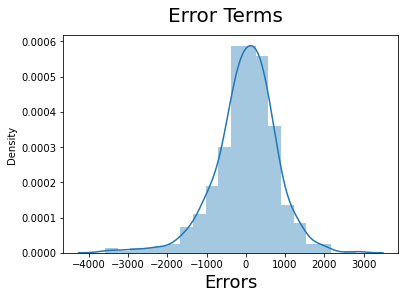

In [70]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

As we can see fro the above graph that the error terms are normally distributed which satisfy the assumption the Linear regression model.

#### Step 5: Prediction and evaluation of the test set

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

In [86]:
#r2 score of the test set

from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test,predicted_value)*100,2),"%")

Test Performance: 80.14 %


In [89]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print("Training Performance:", round(r2_train*100,2),"%")

Training Performance: 83.92 %


In [80]:
# Making predictions using the fifth model
y_pred_value=result_5.predict(X_test_sm)

Text(0, 0.5, 'y_pred_value')

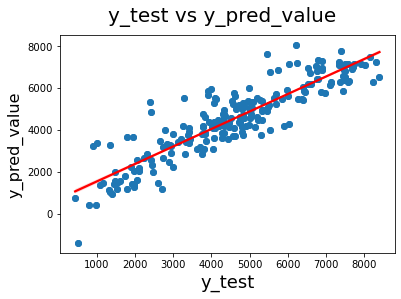

In [90]:
# Plotting y_test and y_pred_value to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_value, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred_value)
fig.suptitle('y_test vs y_pred_value', fontsize = 20)         
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred_value', fontsize = 16)      

### We can see that the equation of our best fitted line is:

cnt = 995.69 * yr + 1175.95 * temp - 223.56 * hum - 189.86 * windspeed - 101.42 * July + 216.14 * Sep - 128.38 * Sun - 344.54 * LightSnow - 213.95 * Mist+Cloudy + 312.48 * summer + 511.36 * winter + 4491.30

#### Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1. The R-squared value of the train set is 83.92% whereas the test set has a value of 80.14% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

2. Through our model we can say that the demand is positively affecting by seasons like summer and winter, together with temp.

3. These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.
